In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

%matplotlib inline

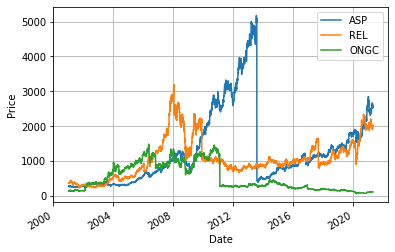

In [4]:
ASP  = pd.read_csv('ASIANPAINT.csv')
REL  = pd.read_csv('RELIANCE.csv')
ONGC = pd.read_csv('ONGC.csv')

#  Convert the date column to DateTime objects
ASP['Date'] = pd.to_datetime(ASP['Date'])
REL['Date'] = pd.to_datetime(REL['Date'])
ONGC['Date'] = pd.to_datetime(ONGC['Date'])

#  Make the dates the frame's index
ASP.set_index('Date', inplace = True)
REL.set_index('Date', inplace = True)
ONGC.set_index('Date', inplace = True)

#  Rename the Adj Close columns.  This is convenient when we build our new frames as the column names have to be unique
ASP = ASP.rename(columns = {'VWAP': 'ASP'})
REL = REL.rename(columns = {'VWAP': 'REL'})
ONGC = ONGC.rename(columns = {'VWAP': 'ONGC'})

#  Select our date range
date_range = pd.date_range('2001-01-03', '2021-04-30')
df = pd.DataFrame(index = date_range)
                  
#Build our new data frame
df = df.join(ASP['ASP'], how = 'inner')
df = df.join(REL['REL'], how = 'inner')
df = df.join(ONGC['ONGC'], how = 'inner')

#  Normalize the price data
#df = df / df.iloc[0]

#  Plot the results
#print(df.head() )
ax = df.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid(True)

In [5]:
def portfolio_returns(alloc, data):
    data = data * alloc
    value = data.sum(axis = 1)
    value  = value[-1]
    
    #  Remember, the minus is because we want to maximize this function and our optimizer
    #  finds the minimum.
    return -value

def sharpe_ratio(alloc, data):
    data = data * alloc
    values = data.sum(axis = 1)
    daily_returns = values.pct_change().to_numpy()
    daily_returns = daily_returns[1:]
    
    return -np.mean(daily_returns) / np.std(daily_returns)

def constraint(alloc):
    return np.sum(alloc) - 1

bounds = ( (0.3,1), (0.3,1), (0.3,1))

In [7]:
#  Set our initial guess and the constraint function.
alloc = [0.2, 0.2, 0.2]
cons = {'type':'eq', 'fun': constraint}

#  Do the optimization
a = minimize(portfolio_returns, alloc, args = df, bounds = bounds, constraints = cons)
print(a)

     fun: -1659.462170844859
     jac: array([-2558.66000366, -2010.20001221,  -109.79000854])
 message: 'Optimization terminated successfully'
    nfev: 23
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.40000046, 0.3       , 0.3       ])


In [8]:
#  Initial cguesses and constraint
alloc = [0.2, 0.2, 0.2]
cons = {'type':'eq', 'fun': constraint}

a = minimize(sharpe_ratio, alloc, args = df, bounds = bounds, constraints = cons)
print(a)

     fun: -0.03398783127527675
     jac: array([-0.01319538,  0.0096611 ,  0.00793274])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.4, 0.3, 0.3])
